## Data Breach Analytics 2005 - 2017

**By Miriam Rodriguez**


### Data Description

#### Dataset
- Dataset name:              Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv
- Source:                    https://www.privacyrights.org/data-breaches (Links to an external site.). 
- Data Description and FAQ:  https://www.privacyrights.org/chronology-data-breaches-faq 
- Duration of the data:      2005 through 2017

#### Data Breach Types
   - CARD - Payment Card Fraud:    Fraud involving debit and credit cards that is not accomplished via hacking (e.g. skimming                                      devices at point-of-service terminals).
   - HACK - Hacking or Malware:    Hacked by outside party or infected by malware
   - INSD - Insider:               Someone with legitimate access intentionally breaches information, such as an employee,                                          contractor, or customer)
   - PHYS - Physical Loss:         Includes paper documents that are lost, discarded, or stolen (non-electronic)
   - PORT - Portable Device:       Lost, discarded, or stolen laptop, PDA, smartphone, memory stick, CDs, hard drive, data tape,                                    etc.
   - STAT - Stationary Device:     Stationary computer loss (lost, inappropriately accessed, discarded, or stolen computer or                                      server not designed for mobility)
   - DISC - Unintended Disclosure: Unintended disclosure (not involving hacking, intentional breach, or physical loss i.e.                                          sensitive information posted publicly, mishandled, sent to the wrong party via publishing                                      online, sending in an email, sending in a mailing or sending via fax.
   - Unknown

#### Institution/Organization) Type
-	BSF - Businesses - Financial and Insurance Services
-	BSO - Businesses - Other
-	BSR - Businesses - Retail/Merchant – Including Online Retail
-	EDU - Educational Institutions
-	GOV - Government & Military
-	MED - Healthcare - Medical Providers & Medical Insurance Services
-	NGO - Nonprofit Organizations

#### Data elements/column names
1.	Date Made Public: Date Breach information released to public (date: year, month, day)
2.	Company: Company breached (text)
3.	City: City of breached company (text)
4.	State: State of breached company (text)
5.	Type of Breach: Refer to four-character Breach Type above
6.	Type of Organization: Refer to three-character Institution/Organization Type above
7.	Total Records: Number of records breached (integer)
8.	Description of Incident: Text describing breach (text)
9.	Information Source: Location of database source (text)
10.	Source URL: Location of data source URL (text)
11.	Year of Breach: Four digit year (numeric)
12.	Latitude: Location Latitude (signed numeric long)
13.	Longitude: Location Longitude (signed numeric long)


In [80]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Importing Data & Basic Statistics

In [81]:
#import breach data ... open or read the breach data
df=pd.read_csv("Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv")
df.head()


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,Dataloss DB,NaN,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",Dataloss DB,NaN,2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,Dataloss DB,NaN,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,Dataloss DB,NaN,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,Dataloss DB,NaN,2007.0,33.209841,-87.569174


### Determine data types and missing values

In [82]:
# how many missing values in each column or variable
df.isnull().sum()

Date Made Public              0
Company                       0
City                       2520
State                        68
Type of breach                0
Type of organization          0
Total Records                38
Description of incident       3
Information Source           54
Source URL                 5410
Year of Breach               33
Latitude                      0
Longitude                     0
dtype: int64

**There are 8202 records total.**  

** There are data quality issues**


** Based upon above counts, there are missing values for City, State, Total_Recs, Description, Breach_Year **
** Latitude and Longitude should be objects or a different data type **

Column name: City 
- How resolved: Replace spaces with 'Not Specified'
- Justification: This value was not provided in the file.

Column name: State
- How resolved: Replace spaces with 'Not Specified'
- Justification: This value was not provided in the file.

Column name: Total_Recs 
- How resolved: Move zeros to null values. Then convert to float to remove zeros, then convert to int.
- Justification: This will enable the ability to measure the quanitative impact.

Column name: Description 
- How resolved: Replace spaces with 'None'
- Justification: This value was not provided in the file.

Column name: Breach_Year
- How resolved:   Delete the column
- Justification:  We have date with year with no empty values so do not need this field


Remove the following fields as they are not needed:
- Information Source 
- Source URL 

In [83]:
#Two columns (Information Source, Source URL) are not necessary for analysis. They will be dropped.
df = df.drop(['Information Source', 'Source URL'], axis=1)
df.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Year of Breach,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,2007.0,33.209841,-87.569174


Remove spaces from field names (rename)
- Total Records:           Total_Recs
- Description of incident: Description
- Year of Breach:          Breach_Year
- Type of organization:    Organization_Type
- Type of breach:          Breach_Type
- Date Made Public         Date_Public

In [84]:
# rename columns
df = df.rename(columns={'Total Records': 'Total_Recs'})
df.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total_Recs,Description of incident,Year of Breach,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,2007.0,33.209841,-87.569174


In [85]:
# rename columns Description of incident: Description
df = df.rename(columns={'Description of incident': 'Description'})

In [86]:
# rename columns Year of Breach:          Breach_Year
df = df.rename(columns={'Year of Breach': 'Breach_Year'})

In [87]:
# rename columns Type of organization:    Organization_Type
df = df.rename(columns={'Type of organization': 'Organization_Type'})

In [88]:
# rename columns Date Made Public:    Date_Public
df = df.rename(columns={'Date Made Public': 'Date_Public'})

In [89]:
# rename columns Type of breach:          Breach_Type
df = df.rename(columns={'Type of breach': 'Breach_Type'})
df.head()

,Date_Public,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Breach_Year,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,2007.0,33.209841,-87.569174


*First, need to resolve missing Year of Breach (since date made public all there, can convert to date and use that year).  Convert the date from an object to a date timestamp.*

In [90]:
df['Date_Public'] =  pd.to_datetime(df['Date_Public'])

In [91]:
#Drop column Breach_Year which has missing values. No longer needed since Date_Public has no missing values.
df = df.drop(['Breach_Year'], axis=1)
df.head()

,Date_Public,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008-05-16,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008-03-21,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",33.520661,-86.802490
2,2007-08-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007-06-03,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007-04-05,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [109]:
# replace null value with zero 
df = df.fillna({'Total_Recs': 0})
df.isnull().sum()

Date_Public             0
Company                 0
City                 2520
State                  68
Breach_Type             0
Organization_Type       0
Total_Recs              0
Description             3
Latitude                0
Longitude               0
dtype: int64

In [112]:
#Convert Total_Recs to float
df["Total_Recs"] = df["Total_Recs"].str.replace(",","").astype(float)

In [113]:
df["Total_Recs"] = df["Total_Recs"].astype(int)

In [114]:
df.head()

,Date_Public,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008-05-16,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008-03-21,Compass Bank,Birmingham,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490
2,2007-08-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007-06-03,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007-04-05,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [115]:
# replace null value with 'not specified' 
df = df.fillna({'City': 'Not Specified'})

In [116]:
# replace null value with 'not specified' 
df = df.fillna({'State': 'Not Specified'})

In [117]:
# replace null value with 'not specified' 
df = df.fillna({'Description': 'None'})
df.isnull().sum()

Date_Public          0
Company              0
City                 0
State                0
Breach_Type          0
Organization_Type    0
Total_Recs           0
Description          0
Latitude             0
Longitude            0
dtype: int64

# Data understanding & processing (ETL)

In [118]:
#show the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 10 columns):
Date_Public          8202 non-null datetime64[ns]
Company              8202 non-null object
City                 8202 non-null object
State                8202 non-null object
Breach_Type          8202 non-null object
Organization_Type    8202 non-null object
Total_Recs           8202 non-null int32
Description          8202 non-null object
Latitude             8202 non-null float64
Longitude            8202 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 608.8+ KB


In [119]:
#describe the column Type of Organization only (e.g., count, unique, frequency)
df['Organization_Type'].describe()

count     8202
unique       7
top        MED
freq      4078
Name: Organization_Type, dtype: object

##### 'MED' is top organization type

In [120]:
#describe the column Type of Breach only (e.g., count, unique, frequency)
df['Breach_Type'].describe()


count     8202
unique       8
top       HACK
freq      2454
Name: Breach_Type, dtype: object

##### 'HACK' is top type of breach.

In [121]:
#describe the column City only (e.g., count, unique, frequency)
df['City'].describe()

count              8202
unique             1595
top       Not Specified
freq               2520
Name: City, dtype: object

In [122]:
#describe the column State only (e.g., count, unique, frequency)
df['State'].describe()

count           8202
unique            66
top       California
freq            1287
Name: State, dtype: object

##### 'California' is top state for breaches reported.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE580F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC509B0>]], dtype=object)

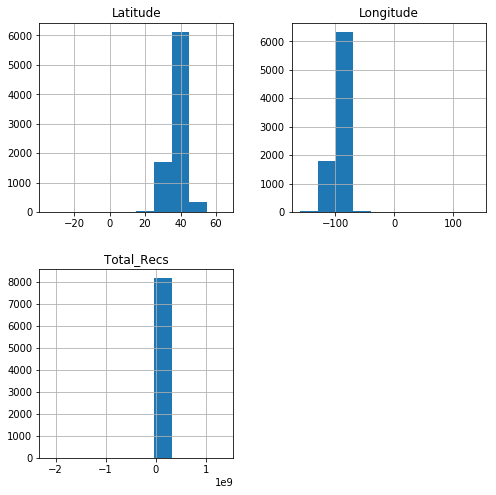

In [123]:
df.hist(figsize=(8,8))